In [ ]:
!pip install librosa
!pip install numpy
!pip install pandas
!pip install umap-learn

import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
import umap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import sys
import re
import matplotlib.pyplot as plt
from collections import Counter

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/My Drive/ML Final Project/Split Audio CSVs/gtzan_df_bass.csv'
gtzan_df_bass = pd.read_csv(file_path)
gtzan_df_bass = gtzan_df_bass.rename(columns={'song': 'track_number'})
gtzan_df_bass = gtzan_df_bass.rename(
    columns={col: f'bass_{col}' for col in gtzan_df_bass.columns if col not in ['track_number', 'genre']}
)
gtzan_df_bass['track_number'] = gtzan_df_bass['track_number'].str.split('.').str[-1]
gtzan_df_bass

,track_number,genre,bass_chroma_stft_mean,bass_chroma_stft_var,bass_rms_mean,bass_rms_var,bass_spectral_centroid_mean,bass_spectral_centroid_var,bass_spectral_bandwidth_mean,bass_spectral_bandwidth_var,...,bass_mfcc16_mean,bass_mfcc16_var,bass_mfcc17_mean,bass_mfcc17_var,bass_mfcc18_mean,bass_mfcc18_var,bass_mfcc19_mean,bass_mfcc19_var,bass_mfcc20_mean,bass_mfcc20_var
0,050,rock,0.344451,0.104585,0.055407,6.740410e-04,304.108024,8655.647387,777.126524,51021.382806,...,-1.516987,19.138052,-4.872094,18.234318,-5.794249,17.386513,-5.119729,13.925966,-6.996159,11.955784
1,030,rock,0.304878,0.105150,0.056127,4.680288e-04,341.889846,16295.607327,718.567638,27844.094913,...,1.505472,17.645031,-3.384491,17.062420,-3.014888,21.182110,-0.671284,14.840761,-2.754175,21.647053
2,049,rock,0.376786,0.100451,0.139957,7.801194e-04,262.418096,1691.300690,535.278364,6243.555256,...,-2.606597,17.611399,-1.202490,13.892355,-1.275316,13.464798,-3.498167,13.196599,-5.064451,11.405540
3,993,reggae,0.368284,0.109318,0.083439,1.195522e-03,265.225568,21013.718499,820.912222,82563.121516,...,0.871803,11.332233,0.884072,14.581746,2.091709,11.068915,1.953094,17.938862,-2.440690,11.794702
4,992,reggae,0.367472,0.106379,0.073787,1.393919e-03,269.376401,19928.957101,822.128281,99843.365637,...,-0.094424,12.243605,0.588062,20.495281,0.573614,21.750097,0.044010,11.379631,-1.953591,10.902185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,075,blues,0.356306,0.089685,0.000177,4.257944e-09,2869.768480,71965.604480,2786.501637,14495.654366,...,4.150842,30.652412,1.659817,27.099241,3.765449,25.845856,-2.623398,31.572510,0.662915,22.997690
10026,092,blues,0.406472,0.076654,0.000095,1.497695e-09,3324.907984,131536.313544,2941.396683,8242.236577,...,5.964634,34.066120,-2.613656,16.666443,3.222893,14.920960,3.898672,48.289500,6.726277,49.985660
10027,106,blues,0.360213,0.086493,0.000235,2.038820e-08,3265.549392,154179.393763,2828.084669,20563.939265,...,-1.756126,61.160114,-5.222780,35.636658,0.170185,24.839315,-3.275205,53.280556,-3.000752,29.154737
10028,049,blues,0.501683,0.065601,0.000117,2.664104e-09,3465.946527,151838.595313,2830.518991,31691.378300,...,4.303782,19.926775,-3.402559,22.118484,0.605400,25.126307,-4.006679,29.536478,-2.319748,12.596759


In [ ]:
file_path = '/content/gdrive/My Drive/ML Final Project/Split Audio CSVs/gtzan_df_drums.csv'
gtzan_df_drums = pd.read_csv(file_path)
gtzan_df_drums = gtzan_df_drums.rename(columns={'song': 'track_number'})
gtzan_df_drums = gtzan_df_drums.rename(
    columns={col: f'bass_{col}' for col in gtzan_df_bass.columns if col not in ['track_number', 'genre']}
)
gtzan_df_drums['track_number'] = gtzan_df_drums['track_number'].str.split('.').str[-1]
gtzan_df_drums

,track_number,genre,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,954,reggae,0.517023,0.072358,0.066408,3.565144e-03,3218.735412,5.576736e+05,2894.643512,59239.965120,...,1.775382,53.718346,-9.781089,21.900053,6.539007,35.212340,-1.221867,34.503242,-5.723320,20.314394
1,940,reggae,0.546607,0.072359,0.006853,1.628644e-04,2744.564634,4.382401e+05,2506.896582,133317.067799,...,-1.848715,29.153063,-0.727699,25.911205,-2.176814,20.814100,-7.838016,23.342134,0.153047,26.356503
2,969,reggae,0.787514,0.040684,0.004455,3.281095e-07,975.939301,2.304481e+05,1829.241774,98373.663918,...,3.741385,16.806010,-2.376388,30.580309,5.459804,23.450787,0.316842,24.389822,2.534882,20.564005
3,008,rock,0.503983,0.076899,0.026845,1.609085e-03,2829.886674,1.168444e+06,2401.317732,76720.447746,...,1.146237,63.365883,-2.891309,40.994526,4.726071,43.320644,-2.091009,30.850668,-6.989221,28.642530
4,024,rock,0.528071,0.088790,0.076483,2.415418e-03,1964.762055,5.294373e+05,2213.419689,145895.093632,...,6.117982,16.291111,-2.292612,32.991590,2.344563,25.992872,-0.618087,22.035032,3.466972,20.789747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10114,149,blues,0.476642,0.073014,0.000460,8.784331e-09,3857.087158,6.078735e+05,3298.899790,68695.378273,...,2.117552,40.008620,-5.551836,57.744717,0.129610,48.071080,-3.407312,48.337580,3.275857,35.695683
10115,135,blues,0.575309,0.071733,0.001082,1.554833e-07,5569.363460,8.329882e+05,3672.588029,108385.356226,...,11.457705,30.906136,4.764077,22.471018,6.468541,32.075962,2.807182,31.592632,5.145520,31.150406
10116,132,blues,0.520869,0.091239,0.009597,4.749039e-05,2723.869658,1.273221e+06,3642.794524,319692.076797,...,8.110435,24.233633,1.985910,21.769848,5.013714,17.291515,0.644852,22.636597,3.427377,23.184963
10117,109,blues,0.497880,0.088646,0.015683,1.951501e-04,2211.999286,9.976851e+05,2722.227819,258602.628252,...,-2.118788,38.617150,-1.415514,34.801308,-3.680704,50.259174,1.727930,33.192253,3.743223,40.810112


In [ ]:
file_path = '/content/gdrive/My Drive/ML Final Project/Split Audio CSVs/gtzan_df_vocals.csv'
gtzan_df_vocals = pd.read_csv(file_path)
gtzan_df_vocals

,track_number,vocals_chroma_stft_mean,vocals_chroma_stft_var,vocals_rms_mean,vocals_rms_var,vocals_spectral_centroid_mean,vocals_spectral_centroid_var,vocals_spectral_bandwidth_mean,vocals_spectral_bandwidth_var,vocals_rolloff_mean,...,vocals_mfcc16_var,vocals_mfcc17_mean,vocals_mfcc17_var,vocals_mfcc18_mean,vocals_mfcc18_var,vocals_mfcc19_mean,vocals_mfcc19_var,vocals_mfcc20_mean,vocals_mfcc20_var,genre
0,203,0.284182,0.098650,0.025447,2.452536e-04,1933.493718,1.200018e+06,1840.883101,618712.263558,3803.197674,...,83.534520,0.323058,126.749160,2.586647,75.528130,-1.384253,61.440506,0.770984,55.391438,blues
1,256,0.350712,0.086538,0.000149,2.126363e-08,2925.459234,5.478233e+05,2879.892191,108734.601932,6474.260330,...,63.445896,-0.897677,30.081755,-3.559264,38.562714,-11.502848,42.183197,-5.279834,43.006474,blues
2,219,0.331310,0.089134,0.000122,3.103360e-09,2245.156362,1.611820e+05,2742.705309,92741.049491,5489.954552,...,58.805250,1.609534,53.768600,-2.648204,54.194996,-1.981927,25.607920,6.935824,41.272230,blues
3,217,0.229047,0.101323,0.076215,4.652656e-03,3301.938520,9.641026e+05,2416.423118,84727.813162,6067.689408,...,269.207060,13.019349,123.970116,7.333295,263.861600,12.174819,307.431340,8.742999,360.203370,blues
4,170,0.254902,0.100429,0.067253,1.820863e-03,3673.145229,9.380727e+05,2565.534534,72780.897610,6515.045876,...,604.206850,9.736767,827.305240,-2.013040,317.676940,-9.684976,147.478490,-4.762739,280.794500,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,107,0.230901,0.088971,0.054985,1.035909e-03,2084.775923,5.842405e+05,1864.280959,104092.592953,3878.897733,...,117.002590,-0.725194,142.753480,-11.997701,106.716570,-3.600635,76.735565,-0.809596,79.317090,jazz
10166,027,0.231437,0.088893,0.000117,2.042405e-09,2811.734425,7.614727e+04,2725.456169,34296.199480,6113.176213,...,32.033657,-11.814101,20.045618,-5.606838,41.628550,4.832883,71.053540,7.177568,93.803230,jazz
10167,082,0.173866,0.088046,0.057837,1.472094e-03,2290.705648,7.571714e+05,2146.955975,225566.446174,4611.443950,...,358.923220,2.285093,333.177150,-6.998977,119.014100,-7.095094,110.442880,-8.761250,76.136154,jazz
10168,101,0.281392,0.086782,0.075772,1.433082e-03,2854.960256,1.568536e+05,2268.693904,64237.011407,5392.898914,...,57.384872,-3.148645,49.540173,-7.233894,43.898300,-9.477666,38.887894,-2.534335,56.500744,jazz


In [ ]:
file_path = '/content/gdrive/My Drive/ML Final Project/Split Audio CSVs/gtzan_df_other.csv'
gtzan_df_other = pd.read_csv(file_path)
gtzan_df_other

,track_number,other_chroma_stft_mean,other_chroma_stft_var,other_rms_mean,other_rms_var,other_spectral_centroid_mean,other_spectral_centroid_var,other_spectral_bandwidth_mean,other_spectral_bandwidth_var,other_rolloff_mean,...,other_mfcc16_var,other_mfcc17_mean,other_mfcc17_var,other_mfcc18_mean,other_mfcc18_var,other_mfcc19_mean,other_mfcc19_var,other_mfcc20_mean,other_mfcc20_var,genre
0,085,0.326293,0.089229,0.041552,0.000633,2065.971832,245373.969756,1937.428753,22663.174324,4165.756722,...,59.697903,-4.739615,39.975517,-20.557787,60.042572,-4.156595,33.242405,2.645038,29.517220,blues
1,086,0.308845,0.090650,0.041890,0.000375,1883.560759,335977.720894,1877.582324,49742.639578,3804.311371,...,74.508644,-8.258644,48.589928,-18.558838,53.028490,-5.311783,28.219324,0.094263,37.661736,blues
2,101,0.217528,0.091697,0.112247,0.005386,2639.862949,366051.483497,1858.005789,242145.289585,4372.492165,...,263.506400,-10.772772,114.799340,-10.674515,374.279970,-12.441288,348.716500,0.853470,180.339500,blues
3,044,0.250689,0.087485,0.092741,0.001850,3105.379208,335178.785619,2372.757630,80860.240620,5674.583258,...,50.084522,-14.152936,38.216910,5.492592,153.585100,2.775925,141.981720,-11.730684,122.595520,blues
4,075,0.224144,0.087240,0.086048,0.003141,1611.682855,435904.333007,1793.818792,141240.060525,3252.515216,...,84.563736,-1.204214,46.688564,-2.852796,40.699880,0.083334,58.293710,-3.227333,58.633724,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,032,0.326626,0.077951,0.099866,0.000152,1507.554556,39751.700797,1461.558477,22191.613689,2803.739894,...,14.125636,-18.262432,22.682386,-5.903534,19.862883,-7.462909,40.279583,-8.290307,38.414307,jazz
10095,018,0.346579,0.087826,0.015765,0.000015,1266.885254,101576.720161,1610.335268,119565.485591,2303.635424,...,34.185770,-9.832532,21.909230,-7.890743,23.853200,-4.642042,39.536915,4.467084,68.922120,jazz
10096,066,0.285662,0.096280,0.074374,0.000928,1703.412053,294682.086217,1992.452121,205169.198229,3583.596039,...,60.406906,-18.668907,45.993070,-8.416432,97.446550,-5.418159,120.602104,0.523336,88.814040,jazz
10097,072,0.145115,0.076826,0.067712,0.000261,2086.759397,126526.790764,1965.955104,22470.937704,3253.600223,...,64.004460,-0.910311,132.880970,4.094966,72.680350,-22.722473,319.539580,-26.266565,149.548840,jazz


In [ ]:
# merge the 4 dfs on 'track_number' and 'genre' columns
gtzan_df_split = gtzan_df_bass.merge(gtzan_df_drums, on=['track_number', 'genre'], suffixes=('_bass', '_drums')) \
                         .merge(gtzan_df_other, on=['track_number', 'genre'], suffixes=('', '_other')) \
                         .merge(gtzan_df_vocals, on=['track_number', 'genre'], suffixes=('', '_vocals'))
gtzan_df_split = gtzan_df_split.drop(columns=['track_number'])
gtzan_df_split = gtzan_df_split[[col for col in gtzan_df_split.columns if col != 'genre'] + ['genre']]
gtzan_df_split = gtzan_df_split.rename(columns={'genre': 'label'})

gtzan_df_split.iloc[:, :-1] = gtzan_df_split.iloc[:, :-1].applymap(
    lambda x: float(re.sub(r'[^0-9.]', '', str(x)))
)
gtzan_df_split.iloc[:, :-1] = gtzan_df_split.iloc[:, :-1].astype(float)
# identify columns whose names end with 'var'
columns_to_transform = [col for col in gtzan_df_split.columns if col.endswith('var')]
# apply IHS transformation to those columns
gtzan_df_split[columns_to_transform] = np.arcsinh(gtzan_df_split[columns_to_transform])

gtzan_df_split

<ipython-input-66-1f6cbb24cebd>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gtzan_df_split.iloc[:, :-1] = gtzan_df_split.iloc[:, :-1].applymap(


,bass_chroma_stft_mean,bass_chroma_stft_var,bass_rms_mean,bass_rms_var,bass_spectral_centroid_mean,bass_spectral_centroid_var,bass_spectral_bandwidth_mean,bass_spectral_bandwidth_var,bass_rolloff_mean,bass_rolloff_var,...,vocals_mfcc16_var,vocals_mfcc17_mean,vocals_mfcc17_var,vocals_mfcc18_mean,vocals_mfcc18_var,vocals_mfcc19_mean,vocals_mfcc19_var,vocals_mfcc20_mean,vocals_mfcc20_var,label
0,0.344451,0.104395,0.055407,0.000674,304.108024,9.759114,777.126524,11.533147,305.804869,10.545677,...,4.746071,4.777507,4.631124,8.839378,5.987632,5.923835,4.909662,10.710985,4.484124,rock
1,0.304878,0.104958,0.056127,0.000468,341.889846,10.391798,718.567638,10.927523,519.801508,12.324331,...,3.981910,2.339007,3.889091,4.542096,3.963973,5.410899,4.314271,0.813334,4.121604,rock
2,0.376786,0.100283,0.139957,0.000780,262.418096,8.126400,535.278364,9.432452,352.537184,9.403892,...,4.796414,8.944429,4.780577,7.140727,4.479928,5.862020,4.117427,8.220122,4.343983,rock
3,0.368284,0.109101,0.083439,0.001196,265.225568,10.646078,820.912222,12.014466,218.420126,12.160200,...,5.000347,7.610831,4.651712,4.681351,4.111893,0.408564,4.721592,2.883847,3.693773,reggae
4,0.367472,0.106180,0.073787,0.001394,269.376401,10.593076,822.128281,12.204505,195.968841,11.304128,...,3.859497,2.170966,4.163714,1.843156,4.064914,0.120269,3.830798,2.070209,4.165920,reggae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.356306,0.089566,0.000177,2.155446,2869.768480,11.877091,2786.501637,10.274751,6315.905478,13.000150,...,4.923677,2.366296,5.071613,7.778379,4.963328,7.507756,5.250006,0.625853,4.939245,blues
9996,0.406472,0.076579,9.477847,1.193484,3324.907984,12.480185,2941.396683,9.710174,7007.221453,12.911803,...,5.056741,3.894124,5.266251,1.314655,5.308379,6.868539,5.787889,7.439227,5.063382,blues
9997,0.360213,0.086385,0.000235,1.460863,3265.549392,12.639019,2828.084669,10.624441,6765.042686,13.701367,...,5.975233,1.981190,5.463941,2.096476,5.470265,1.236438,5.691888,6.831352,6.399045,blues
9998,0.501683,0.065554,0.000117,1.706511,3465.946527,12.623721,2830.518991,11.056947,7088.012695,13.918563,...,4.867683,6.089675,4.555818,1.636437,5.074954,1.431910,4.696097,0.129625,4.958320,blues


In [ ]:
X = gtzan_df_split.iloc[:, :-1]  # all columns except the last one as features
y = gtzan_df_split.iloc[:, -1]   # the last column as the target (genre)

# encode the categorical target variable as integers
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.912

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       192
           1       0.91      0.99      0.95       190
           2       0.89      0.94      0.92       200
           3       0.93      0.94      0.93       218
           4       0.86      0.87      0.87       180
           5       0.93      0.93      0.93       204
           6       0.94      0.92      0.93       190
           7       0.94      0.84      0.89       208
           8       0.94      0.91      0.93       197
           9       0.90      0.84      0.87       221

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
# importing KNN since this is just a quick check and not a final part of the model

from sklearn.neighbors import KNeighborsClassifier

X = gtzan_df_split.iloc[:, :-1]
y = gtzan_df_split.iloc[:, -1]

# encode the categorical target variable as integers
y = y.astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6415

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       192
           1       0.80      0.92      0.86       190
           2       0.47      0.72      0.57       200
           3       0.52      0.61      0.56       218
           4       0.58      0.69      0.63       180
           5       0.82      0.73      0.77       204
           6       0.67      0.63      0.65       190
           7       0.72      0.53      0.61       208
           8       0.69      0.50      0.58       197
           9       0.59      0.37      0.46       221

    accuracy                           0.64      2000
   macro avg       0.66      0.65      0.64      2000
weighted avg       0.65      0.64      0.64      2000



In [ ]:
X = gtzan_df_split.iloc[:, :-1]
y = gtzan_df_split.iloc[:, -1]

# encode the categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# perform t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity = 10.0, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

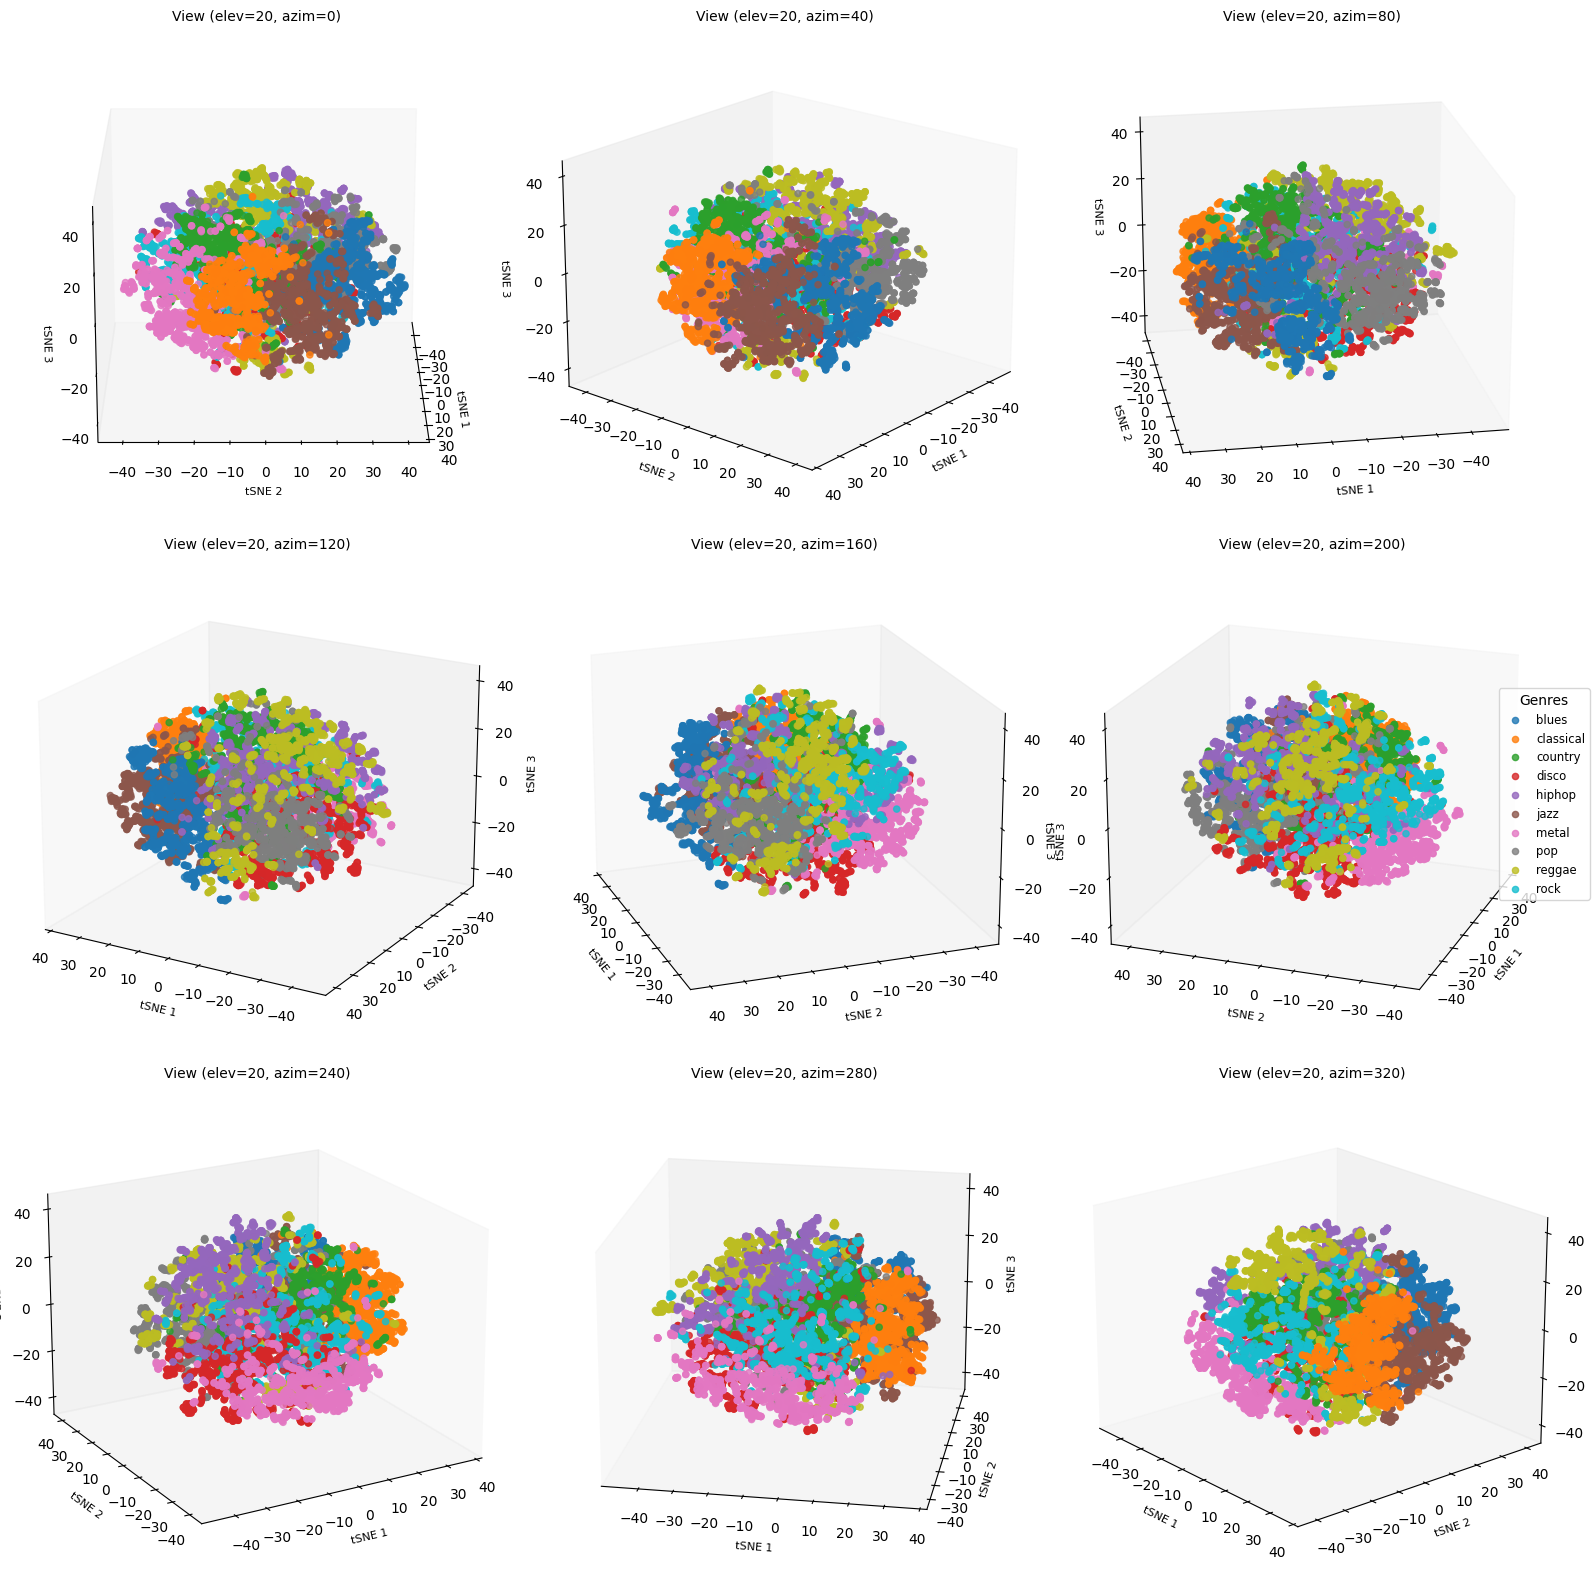

In [ ]:
# map encoded labels back to genre names
unique_labels = np.unique(y_encoded)
genre_names = label_encoder.inverse_transform(unique_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Distinct colors

fig = plt.figure(figsize=(16, 16))

# define multiple viewing angles (elevation and azimuth)
view_angles = [(20, azim) for azim in range(0, 360, 40)]  # 40° increments around azimuth

for i, (elev, azim) in enumerate(view_angles, start=1):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    for genre, color, label in zip(unique_labels, colors, genre_names):
        mask = y_encoded == genre
        ax.scatter(
            X_tsne[mask, 0],
            X_tsne[mask, 1],
            X_tsne[mask, 2],
            label=label,
            color=[color],
            alpha=0.8
        )
    ax.set_title(f"View (elev={elev}, azim={azim})", fontsize=10)
    ax.set_xlabel("tSNE 1", fontsize=8)
    ax.set_ylabel("tSNE 2", fontsize=8)
    ax.set_zlabel("tSNE 3", fontsize=8)
    ax.view_init(elev=elev, azim=azim)
    ax.grid(False)

# add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Genres", loc="center right", fontsize="small")

plt.tight_layout()
plt.show()

# save image to drive
folder_path = '/content/gdrive/My Drive/ML Final Project/Figures'
file_name = 'split_files_analysis_' + 'lower_dimensional_embeddings.png'

os.makedirs(folder_path, exist_ok=True)

file_path = os.path.join(folder_path, file_name)
fig.savefig(file_path)


In [ ]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            neighbor_indices = np.argsort(distances)[:self.k]
            neighbor_labels = self.y_train[neighbor_indices]
            most_common = Counter(neighbor_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

X_train, y_train = X_tsne, y_encoded  # Use lower dimension data


np.random.seed(100)

# shuffle and split data into train and test sets
indices = np.random.permutation(len(X_train))
train_size = int(0.8 * len(X_train))
train_indices, test_indices = indices[:train_size], indices[train_size:]

X_train_split, X_test_split = X_train[train_indices], X_train[test_indices]
y_train_split, y_test_split = y_train[train_indices], y_train[test_indices]

# create, train, and test the KNN model
knn = KNNClassifier(k=3)
knn.fit(X_train_split, y_train_split)

accuracy = knn.score(X_test_split, y_test_split)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [ ]:
X_train, y_train = X_tsne, y_encoded  # Use lower dimension data

np.random.seed(100)

# shuffle and split data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

# create, train, and test the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=100)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_test_split)
accuracy = accuracy_score(y_test_split, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


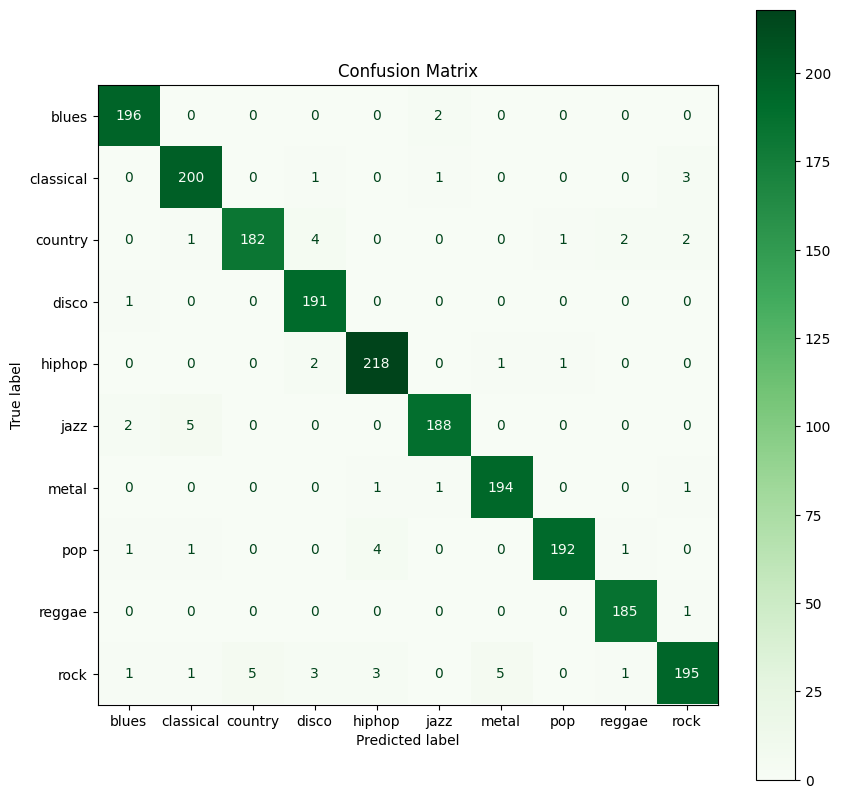

In [ ]:
cm = confusion_matrix(y_test_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap="Greens", colorbar=True)
plt.title("Confusion Matrix")
plt.show()

folder_path = '/content/gdrive/My Drive/ML Final Project/Figures'
file_name = 'split_files_analysis_' + 'confusion_matrix.png'

os.makedirs(folder_path, exist_ok=True)

file_path = os.path.join(folder_path, file_name)
fig.savefig(file_path)